In [1]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [2]:
df<-read.csv('./Windmill.csv')

In [3]:
colnames(df)<-c('Velocity','Output')

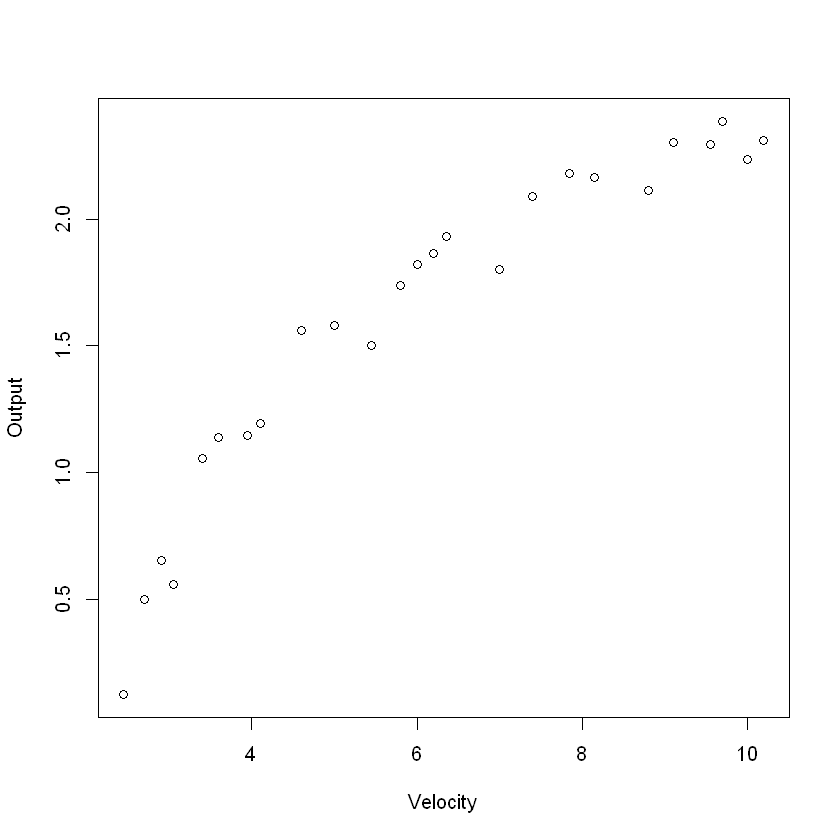

In [4]:
plot(df)

Plot 봤을 때 nonlinear 가능성

In [5]:
fit<-lm(Output~Velocity,data=df)

In [6]:
summary(fit)


Call:
lm(formula = Output ~ Velocity, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59869 -0.14099  0.06059  0.17262  0.32184 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.13088    0.12599   1.039     0.31    
Velocity     0.24115    0.01905  12.659 7.55e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2361 on 23 degrees of freedom
Multiple R-squared:  0.8745,	Adjusted R-squared:  0.869 
F-statistic: 160.3 on 1 and 23 DF,  p-value: 7.546e-12


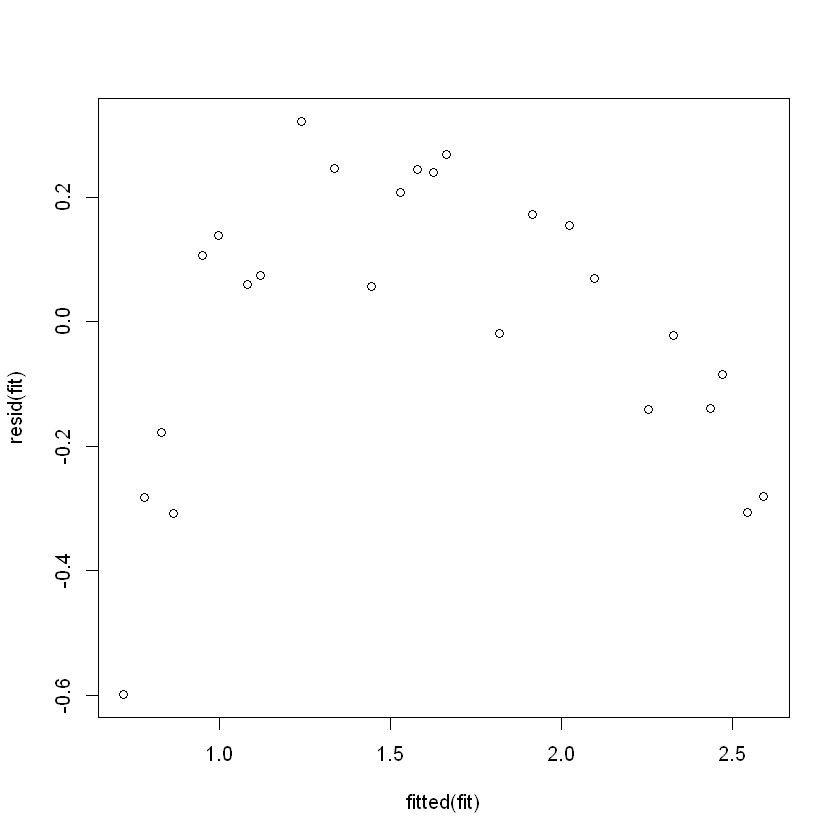

In [7]:
plot(fitted(fit),resid(fit))

residual plot 봤을 떄 활 모양으로 nonlinear<br>
quadratic term 추가 고려<br>
하지만 풍속이 중가할 수록 방앗간 생산량이 증가하다가 감소한다는 점에서 (1/ x) transformation

In [8]:
df2<-df

In [9]:
df2$Velocity<- (1/df$Velocity)

In [10]:
fit2<-lm(Output~ Velocity,data=df2)

In [11]:
summary(fit2)


Call:
lm(formula = Output ~ Velocity, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20547 -0.04940  0.01100  0.08352  0.12204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9789     0.0449   66.34   <2e-16 ***
Velocity     -6.9345     0.2064  -33.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09417 on 23 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9792 
F-statistic:  1128 on 1 and 23 DF,  p-value: < 2.2e-16


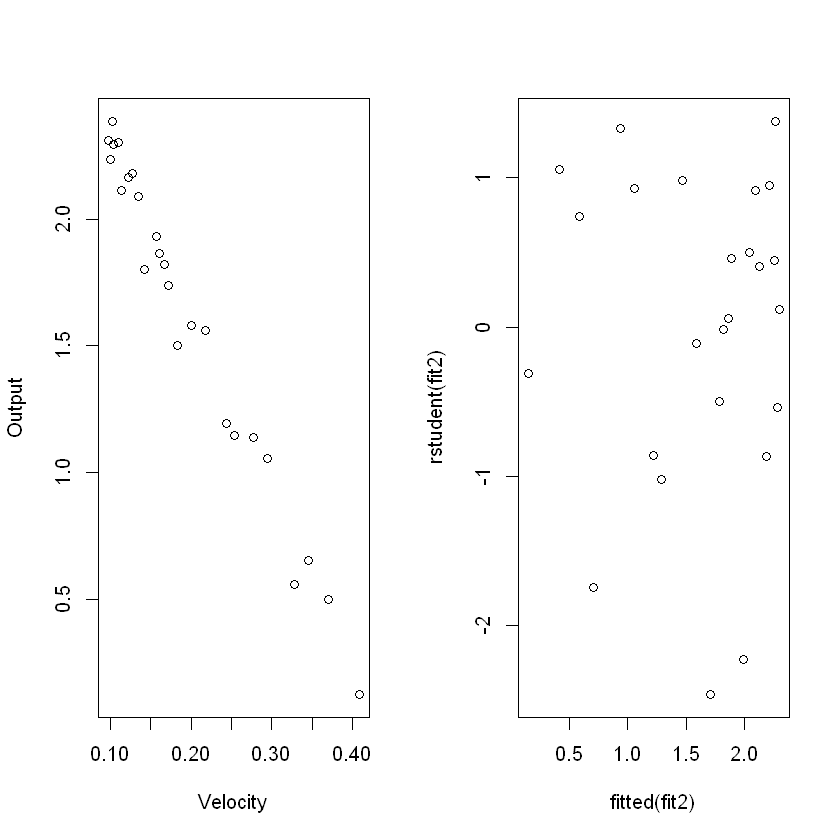

In [12]:
par(mfrow=c(1,2))
plot(df2)
plot(fitted(fit2),rstudent(fit2))

residual plot을 봤을 때 ienquality of varaince 문제 없어 보임<br>
따라서 transformed model이 적합

<b>Box Tidwell Procedure <br></b>

In [14]:
alpha=1
df3<-df
df3$w<- df$Velocity*log(df$Velocity)

In [15]:
fit3<-lm(Output~Velocity+w,data=df3)

In [16]:
summary(fit3)


Call:
lm(formula = Output ~ Velocity + w, data = df3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.223004 -0.029442  0.009955  0.048323  0.181553 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.41684    0.28512  -8.477 2.23e-08 ***
Velocity     1.53443    0.14189  10.814 2.85e-10 ***
w           -0.46260    0.05065  -9.132 6.13e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1103 on 22 degrees of freedom
Multiple R-squared:  0.9738,	Adjusted R-squared:  0.9714 
F-statistic: 408.9 on 2 and 22 DF,  p-value: < 2.2e-16


In [17]:
coef(fit3)

(Intercept)    Velocity           w 
 -2.4168438   1.5344349  -0.4625963

In [18]:
alpha1=alpha+coef(fit3)[3]/coef(fit)[2]
alpha1

w 
-0.9183019

alpha가 -1로 가가ㅃ게 됨<br>
1/x transformation 정당화<br>
이 과정 계속

# Locally Weighted Regression (Loess)

In [19]:
fit_loess<-loess(Output~Velocity,data=df)

In [20]:
summary(fit_loess)

Call:
loess(formula = Output ~ Velocity, data = df)

Number of Observations: 25 
Equivalent Number of Parameters: 4.41 
Residual Standard Error: 0.1017 
Trace of smoother matrix: 4.84  (exact)

Control settings:
  span     :  0.75 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

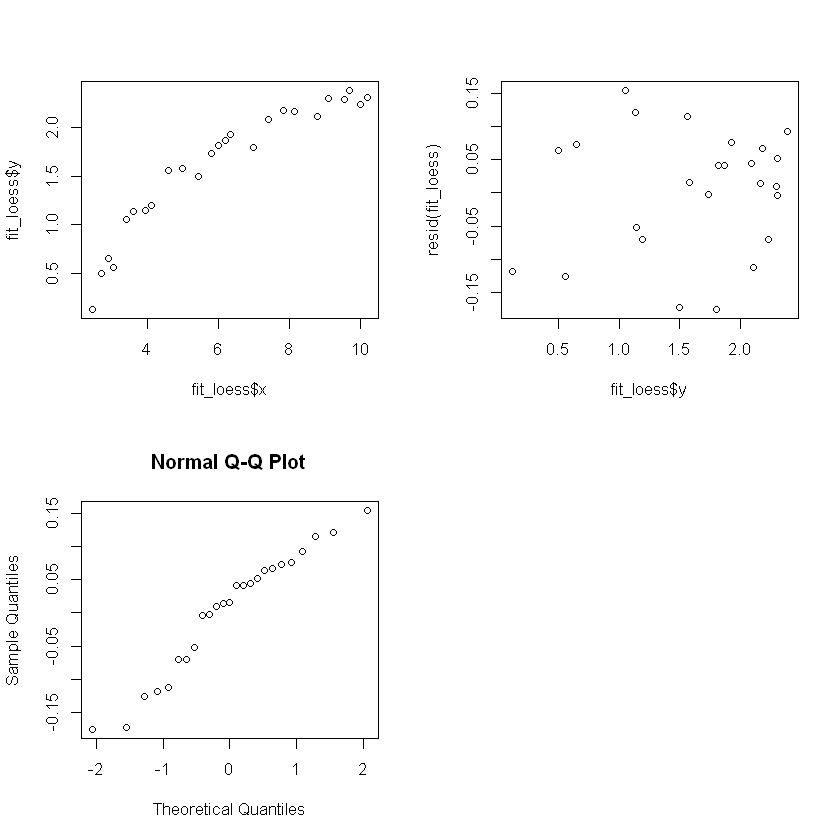

In [21]:
par(mfrow=c(2,2))
plot(fit_loess)
plot( fit_loess$y, resid(fit_loess))
qqnorm(resid(fit_loess))

Normality 봤을 때 완벽하지는 않지만 심각한 문제는 없어 보임 <br>
위의 LSE와 1/x transformation 보다 나아 보임<br>
Parameter 수 : Cubic spline>LOESS>Polynomial>simple linear<br>
Loess는 복잡성 떄문에 black box의 경향 있음